In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer

In [57]:
df = pd.read_csv("houseprices.csv")
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [58]:
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1341,1342,20,RL,66.0,13695,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,155000
482,483,70,RM,50.0,2500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,155000
282,283,120,RL,34.0,5063,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,ConLw,Normal,207500
1383,1384,30,RL,NaN,25339,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,112000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500


In [59]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

transformer = make_column_transformer(
    (OneHotEncoder(drop='first', sparse_output=False), 
     make_column_selector(dtype_include='object')),
    remainder='passthrough'
)

transformed_data = transformer.fit_transform(df)

new_columns = transformer.get_feature_names_out()
df_encoded = pd.DataFrame(transformed_data, columns=new_columns)

In [60]:
df_encoded.head()

,onehotencoder__MSZoning_FV,onehotencoder__MSZoning_RH,onehotencoder__MSZoning_RL,onehotencoder__MSZoning_RM,onehotencoder__Street_Pave,onehotencoder__Alley_Pave,onehotencoder__Alley_nan,onehotencoder__LotShape_IR2,onehotencoder__LotShape_IR3,onehotencoder__LotShape_Reg,...,remainder__WoodDeckSF,remainder__OpenPorchSF,remainder__EnclosedPorch,remainder__3SsnPorch,remainder__ScreenPorch,remainder__PoolArea,remainder__MiscVal,remainder__MoSold,remainder__YrSold,remainder__SalePrice
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


In [61]:
obj_cols = df.select_dtypes(include=['object', 'string']).columns
df_dummies = pd.get_dummies(df[obj_cols], drop_first=True)
df = pd.concat([df.drop(columns=obj_cols), df_dummies], axis=1)

In [62]:
df[df.select_dtypes("number").columns] = SimpleImputer(strategy="most_frequent").fit_transform(df.select_dtypes("number"))

<Axes: >

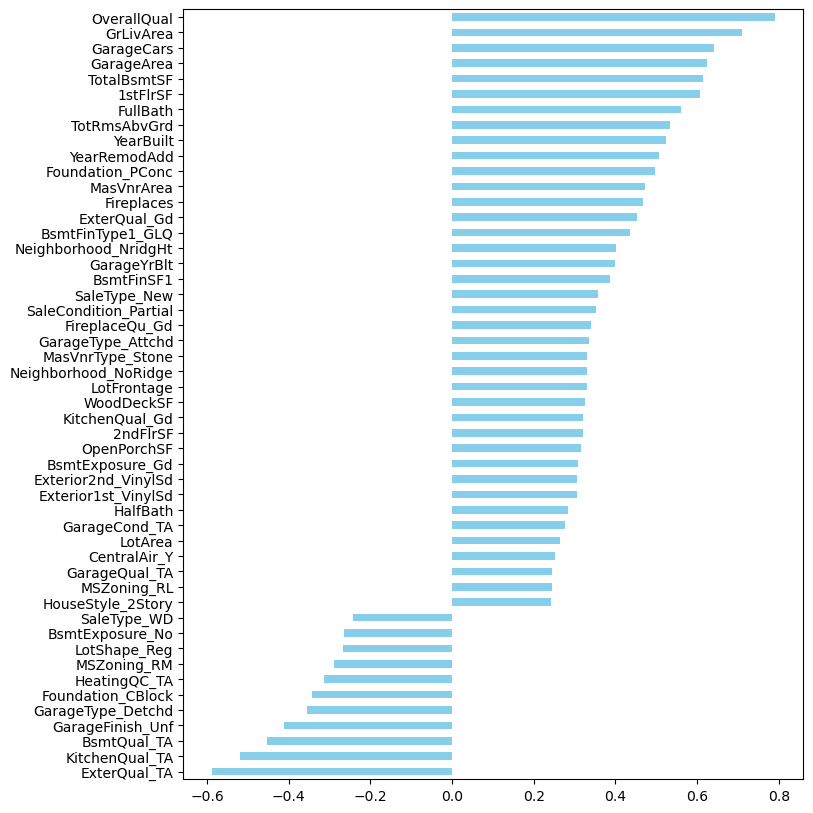

In [63]:
corr = df.corr(numeric_only=True)['SalePrice'].drop('SalePrice')

top_labels = corr.abs().sort_values(ascending=False).head(50).index

top_corr = corr[top_labels].sort_values()

top_corr.plot(kind="barh", figsize=(8, 10), color='skyblue')

In [64]:
y = np.array(df['SalePrice'])
#X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']]
X = df.drop('SalePrice', axis=1)
#X = df.drop(columns=['SalePrice', 'KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold', 'LowQualFinSF', 'Id', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2'])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [67]:
regr = GradientBoostingRegressor(n_estimators=500, max_depth=4, min_samples_split=5, learning_rate=0.01, loss="squared_error")

regr.fit(X_train_scaled, y_train)

y_pred = regr.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error (RMSE):", rmse)
print("Overall score:", regr.score(X_test_scaled, y_test))

Root Mean Square Error (RMSE): 28014.41564537533
Overall score: 0.8976826457241829


In [68]:
def plot_best_tree_curve(X_orig, y_orig, model, scaler, target_feature, poly=None):
    x_min, x_max = X_orig[target_feature].min(), X_orig[target_feature].max()
    x_grid = np.linspace(x_min, x_max, 300)

    grid_df = pd.DataFrame([X_orig.mean().values] * 300, columns=X_orig.columns)
    grid_df[target_feature] = x_grid

    grid_transformed = scaler.transform(grid_df) 
    if poly is not None:
        grid_transformed = poly.transform(grid_transformed)
    
    y_pred_grid = model.predict(grid_transformed)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_orig[target_feature], y_orig, color='red', alpha=0.3, label='Actual Data', s=15)
    plt.plot(x_grid, y_pred_grid, color='blue', linewidth=2.5, label='Decision Tree Prediction')
    
    plt.title(f"Best Decision Tree Fit: {target_feature} vs Target")
    plt.xlabel(target_feature)
    plt.ylabel("Target Value")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

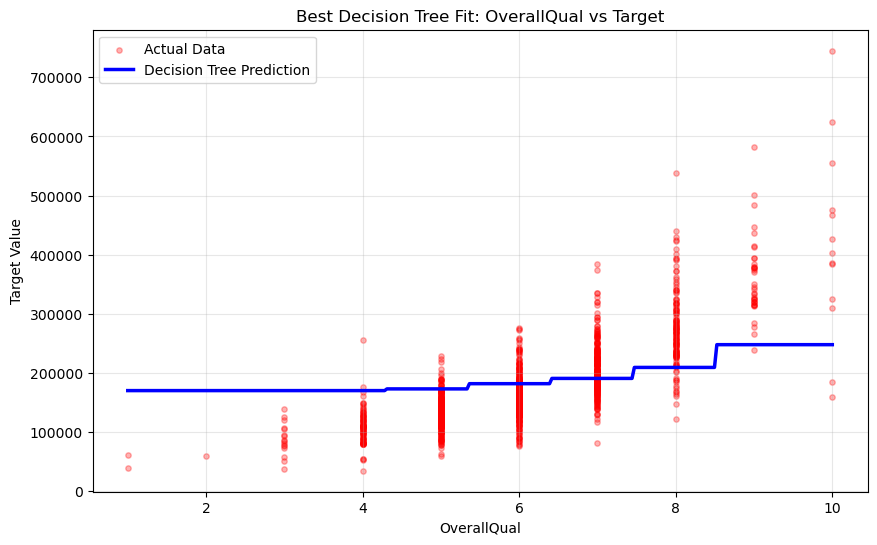

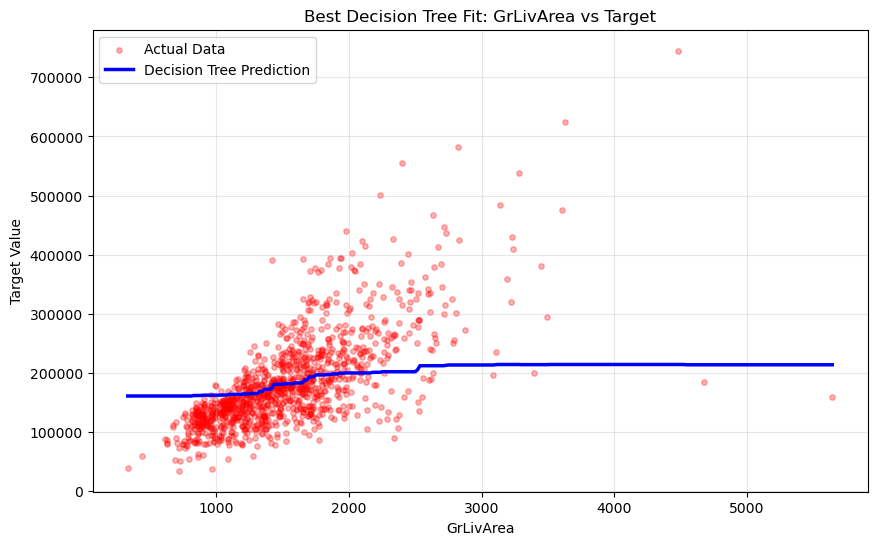

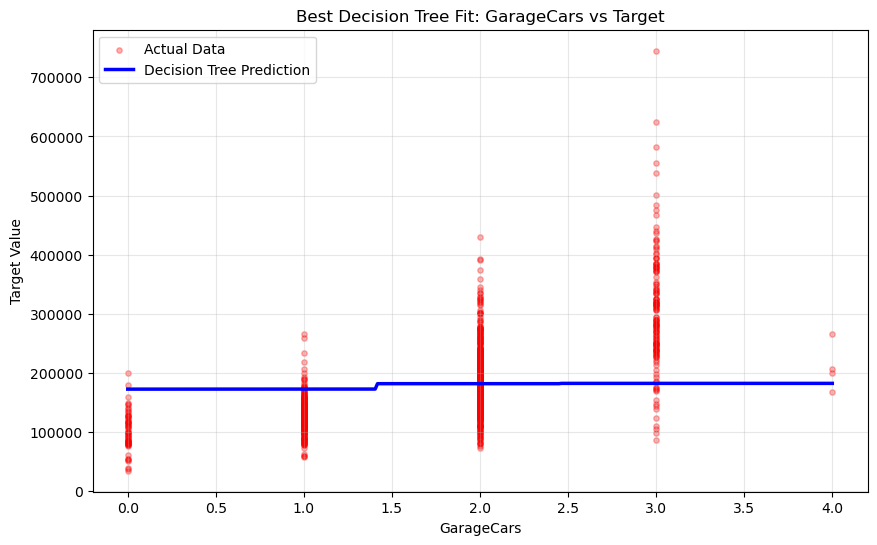

In [69]:
plot_best_tree_curve(
    X_orig=X_train,
    y_orig=y_train,
    model=regr,
    scaler=scaler,
    target_feature='OverallQual', 
    poly=None
)
plot_best_tree_curve(
    X_orig=X_train,
    y_orig=y_train,
    model=regr,
    scaler=scaler,
    target_feature='GrLivArea', 
    poly=None
)
plot_best_tree_curve(
    X_orig=X_train,
    y_orig=y_train,
    model=regr,
    scaler=scaler,
    target_feature='GarageCars', 
    poly=None
)